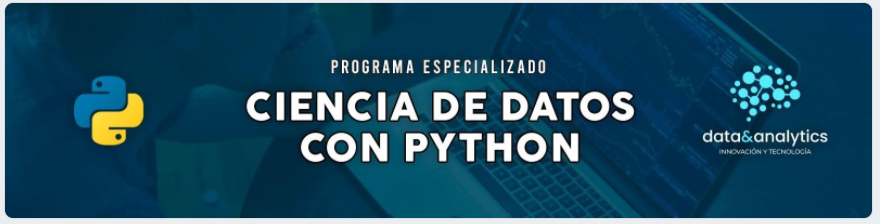

#DATA & ANALYTICS

----------------------------
SESIÓN 03. INTRODUCCION A LA INFERENCIA ESTADISTICA

Instructora: Ing. Yaneth Ccahuantico

E-mail: yane.data@gmail.com

www.datayanalytics.com

In [ ]:
#cargamos las librerias
import pandas as pd
import seaborn as sns # visualización
import statistics as stats # estadística
import random
import matplotlib.pyplot as plt

random.seed(123)

## 1. Importamos los datos

In [ ]:
#cargamos la data desde nuestra PC
from google.colab import files
files.upload()

Saving Data - Riesgos.csv to Data - Riesgos.csv


{'Data - Riesgos.csv': b'ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo\r\n2208,33,128,6,3230,192,2,3,2,1\r\n2211,32,185,7,2930,217,2,1,5,1\r\n2212,28,,7,1883.7,202,2,1,2,1\r\n2216,56,200,0,850,194,2,1,5,1\r\n2218,32,131,65,3200,200,2,1,2,1\r\n2219,34,145,6,7000,196,2,5,2,1\r\n2226,,114,0,2171.5,178,2,2,1,1\r\n2227,27,116,0,800,169,2,1,5,1\r\n2228,26,182,6,3150,190,4,3,5,1\r\n2230,25,154,1,2600,189,2,1,2,1\r\n2233,49,203,0,6350,224,4,1,2,1\r\n2234,49,159,0,3330,221,2,1,5,1\r\n2235,28,127,0,1400,177,2,1,5,1\r\n2236,30,137,0,6000,192,2,1,5,1\r\n2238,45,151,18,1050,173,2,4,5,1\r\n2240,21,118,0,,175,4,1,5,1\r\n2244,37,330,8,2432,174,2,3,5,1\r\n2247,36,257,0,1400,186,2,3,2,1\r\n2248,32,163,0,3000,175,2,3,5,1\r\n2252,25,128,0,889.98,169,2,1,5,1\r\n2254,32,127,0,1200,175,2,1,5,1\r\n2258,38,151,0,2000,180,2,1,5,1\r\n2261,26,148,12,2052.84,196,2,1,2,1\r\n2262,26,142,21,1500,178,2,3,2,1\r\n2263,40,130,5,3486.7,216,4,2,5,1\r\n2264,30,119,0,2833.55,211,2,1,5,1\r\n2267,24,110,0

In [ ]:
#levantamos la data con pandas
data_riesgo = pd.read_csv('Data - Riesgos.csv')  #Data - Riesgos.csv
data_riesgo.head()

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
0,2208,33.0,128.0,6.0,3230.0,192.0,2,3.0,2,1
1,2211,32.0,185.0,7.0,2930.0,217.0,2,1.0,5,1
2,2212,28.0,NaN,7.0,1883.7,202.0,2,1.0,2,1
3,2216,56.0,200.0,0.0,850.0,194.0,2,1.0,5,1
4,2218,32.0,131.0,65.0,3200.0,200.0,2,1.0,2,1


In [ ]:
data_riesgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             4500 non-null   int64  
 1   edad           4487 non-null   float64
 2   meses          4494 non-null   float64
 3   max_ant        4496 non-null   float64
 4   ingreso        4495 non-null   float64
 5   score          4495 non-null   float64
 6   tipo_vivienda  4500 non-null   int64  
 7   zona           4494 non-null   float64
 8   nivel          4500 non-null   int64  
 9   riesgo         4500 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 351.7 KB


### Separamos la data en 2 partes para imputar

In [ ]:
# Data numérica
# 'edad', 'meses', 'max_ant', 'ingreso', 'score'
data_riesgo_num = data_riesgo.loc[:, ['edad', 'meses', 'max_ant', 'ingreso', 'score']]
data_riesgo_num.head(10)

,edad,meses,max_ant,ingreso,score
0,33.0,128.0,6.0,3230.0,192.0
1,32.0,185.0,7.0,2930.0,217.0
2,28.0,NaN,7.0,1883.7,202.0
3,56.0,200.0,0.0,850.0,194.0
4,32.0,131.0,65.0,3200.0,200.0
5,34.0,145.0,6.0,7000.0,196.0
6,NaN,114.0,0.0,2171.5,178.0
7,27.0,116.0,0.0,800.0,169.0
8,26.0,182.0,6.0,3150.0,190.0
9,25.0,154.0,1.0,2600.0,189.0


In [ ]:
# Data categórica
#'tipo_vivienda', 'zona', 'nivel', 'riesgo'
data_riesgo_cat = data_riesgo.loc[:, ['tipo_vivienda', 'zona', 'nivel', 'riesgo']]
data_riesgo_cat.head(6)

,tipo_vivienda,zona,nivel,riesgo
0,2,3.0,2,1
1,2,1.0,5,1
2,2,1.0,2,1
3,2,1.0,5,1
4,2,1.0,2,1
5,2,5.0,2,1


## 2. Información de datos perdidos

In [ ]:
# Observamos los datos perdidos
data_riesgo_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     4487 non-null   float64
 1   meses    4494 non-null   float64
 2   max_ant  4496 non-null   float64
 3   ingreso  4495 non-null   float64
 4   score    4495 non-null   float64
dtypes: float64(5)
memory usage: 175.9 KB


In [ ]:
# Convertimos en tipo "str"
# Observamos los datos perdidos

#data_riesgo_cat = data_riesgo_cat.apply(lambda x: x.astype('str'), axis = 0)

#data_riesgo_cat.info()

Verificamos que no todas las variables son numéricas, tenemos también variables categóricas

## 3. Imputación paramétrica

In [ ]:
# Reemplazando con la median de cada columna: Variables Cuantitativas

data_riesgo_num2 = data_riesgo_num.apply(lambda x: x.fillna(x.median()), axis = 0)

cols_num = data_riesgo_num2.columns

data_riesgo_num2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     4500 non-null   float64
 1   meses    4500 non-null   float64
 2   max_ant  4500 non-null   float64
 3   ingreso  4500 non-null   float64
 4   score    4500 non-null   float64
dtypes: float64(5)
memory usage: 175.9 KB


In [ ]:
# Reemplazando con la moda de cada columna: Variables Cualitativas

from sklearn.impute import SimpleImputer

simple = SimpleImputer(strategy='most_frequent') # Moda
data_riesgo_cat2 = simple.fit_transform(data_riesgo_cat)

data_riesgo_cat2

array([[2., 3., 2., 1.],
       [2., 1., 5., 1.],
       [2., 1., 2., 1.],
       ...,
       [4., 1., 2., 0.],
       [4., 5., 2., 0.],
       [4., 5., 2., 0.]])

In [ ]:
# Convertimos en DataFrame la matriz

data_riesgo_cat2 = pd.DataFrame(
    data=data_riesgo_cat2,
    columns=['tipo_vivienda', 'zona', 'nivel', 'riesgo'])

cols_cual = data_riesgo_cat2.columns

data_riesgo_cat2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tipo_vivienda  4500 non-null   float64
 1   zona           4500 non-null   float64
 2   nivel          4500 non-null   float64
 3   riesgo         4500 non-null   float64
dtypes: float64(4)
memory usage: 140.8 KB


In [ ]:
# Renombramos las columnas cualitativas
import numpy as np

data_riesgo_cat2['tipo_vivienda'] = data_riesgo_cat2['tipo_vivienda'].replace([1, 2, 3, 4, 5, np.nan],
                         ['vivienda A', 'vivienda B','vivienda C','vivienda D','vivienda E', 'vivienda no definida'])

data_riesgo_cat2['zona'] = data_riesgo_cat2['zona'].replace([1.0, 2.0, 3.0, 4.0, 5.0, np.nan],
                         ['zona A', 'zona B','zona C','zona D','zona E', 'zona no definida'])

data_riesgo_cat2['nivel'] = data_riesgo_cat2['nivel'].replace([1, 2, 3, 4, 5, np.nan],
                         ['nivel A', 'nivel B','nivel C','nivel D','nivel E', 'nivel no definido'])

data_riesgo_cat2['riesgo'] = data_riesgo_cat2['riesgo'].replace([0, 1, np.nan],
                         ['riesgoso', 'no riesgoso','riesgo no definido'])


data_riesgo_cat2.sample(10)

,tipo_vivienda,zona,nivel,riesgo
1135,vivienda B,zona A,nivel B,no riesgoso
4078,vivienda B,zona A,nivel E,riesgoso
2091,vivienda B,zona A,nivel B,no riesgoso
234,vivienda D,zona A,nivel E,no riesgoso
1404,vivienda D,zona B,nivel B,no riesgoso
3343,vivienda B,zona A,nivel B,riesgoso
2367,vivienda D,zona A,nivel E,no riesgoso
2252,vivienda B,zona A,nivel B,no riesgoso
3346,vivienda B,zona A,nivel B,riesgoso
2580,vivienda D,zona E,nivel B,no riesgoso


In [ ]:
# Unimos los DataFrame imputados

data_riesgo_f = pd.merge(data_riesgo_num2, data_riesgo_cat2, left_index=True, right_index=True)

data_riesgo_f.to_csv("data_riesgo_3.csv")
data_riesgo_f.sample(10)

,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
3098,55.0,198.0,0.0,3244.85,197.0,vivienda B,zona A,nivel B,no riesgoso
1500,41.0,136.0,9.0,1400.00,197.0,vivienda B,zona A,nivel E,no riesgoso
1947,27.0,196.0,0.0,6657.30,186.0,vivienda B,zona A,nivel E,no riesgoso
894,34.0,170.0,0.0,1600.00,207.0,vivienda B,zona A,nivel E,no riesgoso
908,41.0,162.0,7.0,3800.00,219.0,vivienda B,zona A,nivel B,no riesgoso
4352,37.0,258.0,22.0,2600.00,214.0,vivienda D,zona E,nivel B,riesgoso
1574,30.0,217.0,12.0,2900.00,195.0,vivienda B,zona A,nivel B,no riesgoso
243,30.0,246.0,0.0,800.00,192.0,vivienda B,zona A,nivel E,no riesgoso
215,31.0,195.0,8.0,1500.00,199.0,vivienda B,zona A,nivel B,no riesgoso
1186,26.0,161.0,48.0,2300.00,206.0,vivienda B,zona A,nivel B,no riesgoso


### Cargamos "data_riesgo_f"

In [ ]:
import pandas as pd

data_riesgo_f = pd.read_csv("data_riesgo_3.csv")
data_riesgo_f.head()


,Unnamed: 0,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
0,0,33.0,128.0,6.0,3230.0,192.0,vivienda B,zona C,nivel B,no riesgoso
1,1,32.0,185.0,7.0,2930.0,217.0,vivienda B,zona A,nivel E,no riesgoso
2,2,28.0,161.0,7.0,1883.7,202.0,vivienda B,zona A,nivel B,no riesgoso
3,3,56.0,200.0,0.0,850.0,194.0,vivienda B,zona A,nivel E,no riesgoso
4,4,32.0,131.0,65.0,3200.0,200.0,vivienda B,zona A,nivel B,no riesgoso


In [ ]:
data_riesgo_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4500 non-null   int64  
 1   edad           4500 non-null   float64
 2   meses          4500 non-null   float64
 3   max_ant        4500 non-null   float64
 4   ingreso        4500 non-null   float64
 5   score          4500 non-null   float64
 6   tipo_vivienda  4500 non-null   object 
 7   zona           4500 non-null   object 
 8   nivel          4500 non-null   object 
 9   riesgo         4500 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 351.7+ KB


In [ ]:
cols_num = data_riesgo_f.select_dtypes(include="float64").columns
cols_num

Index(['edad', 'meses', 'max_ant', 'ingreso', 'score'], dtype='object')

In [ ]:
cols_cual=data_riesgo_f.select_dtypes(include="object").columns
cols_cual

Index(['tipo_vivienda', 'zona', 'nivel', 'riesgo'], dtype='object')

## Visualización

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

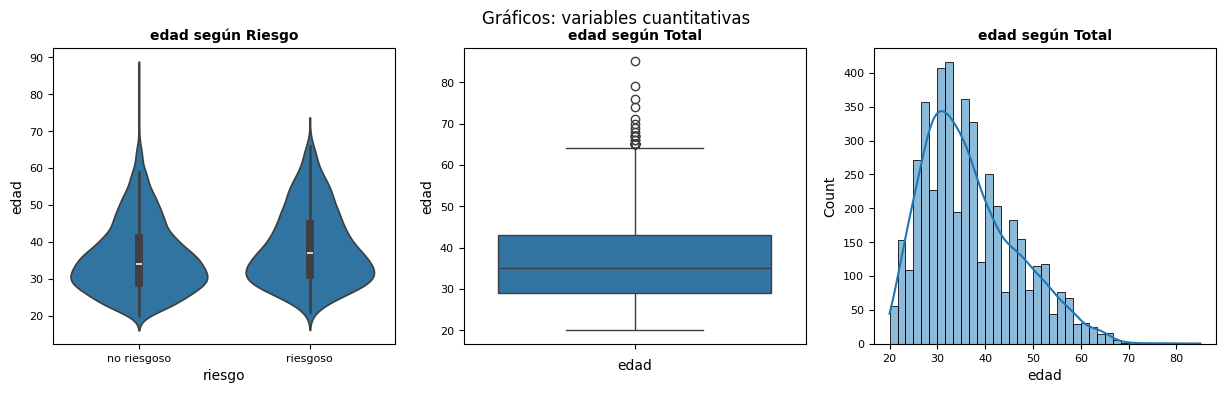

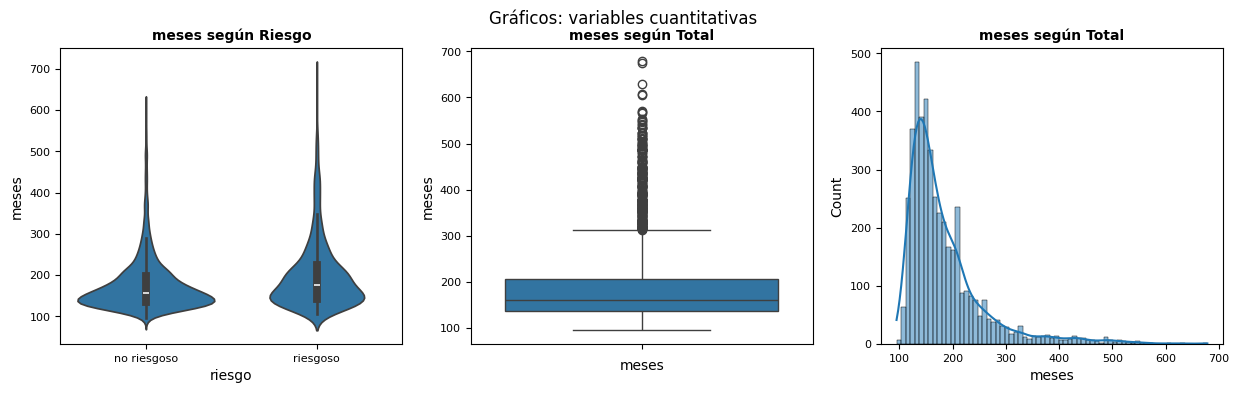

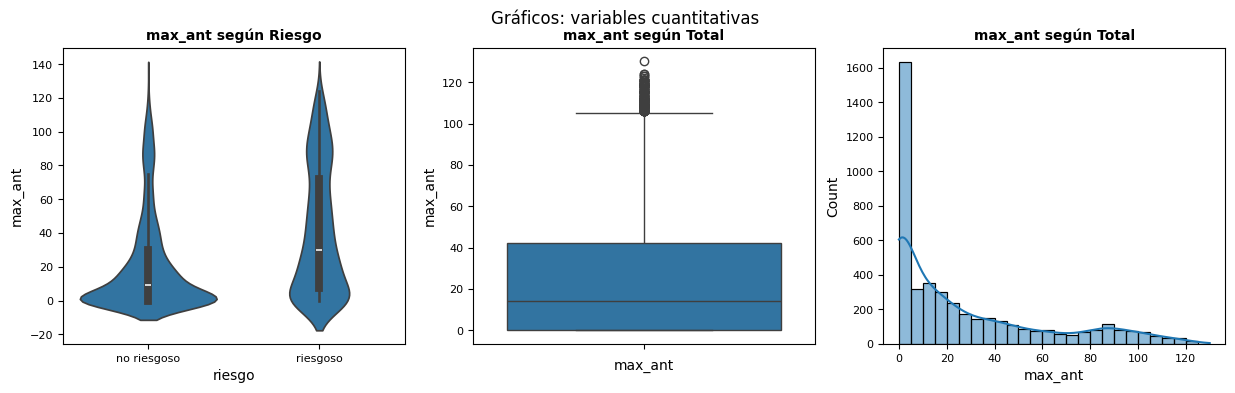

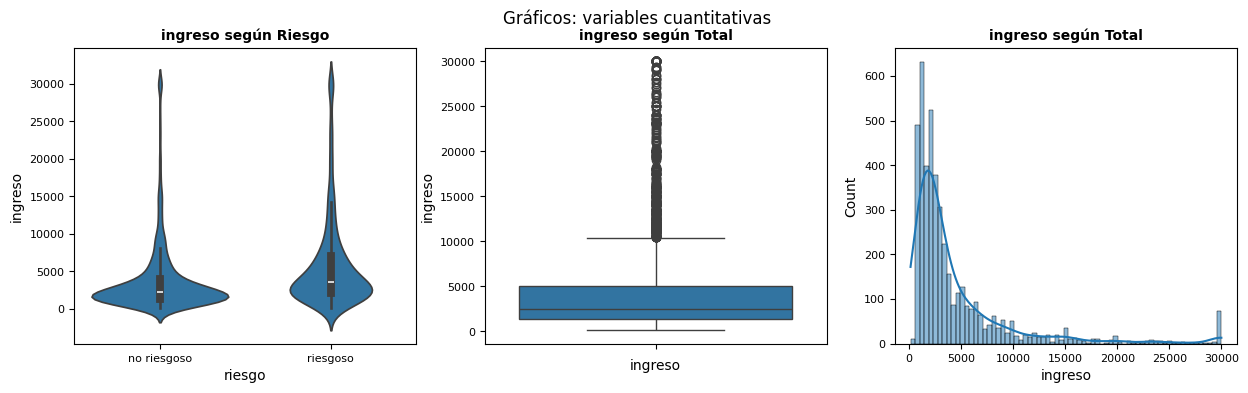

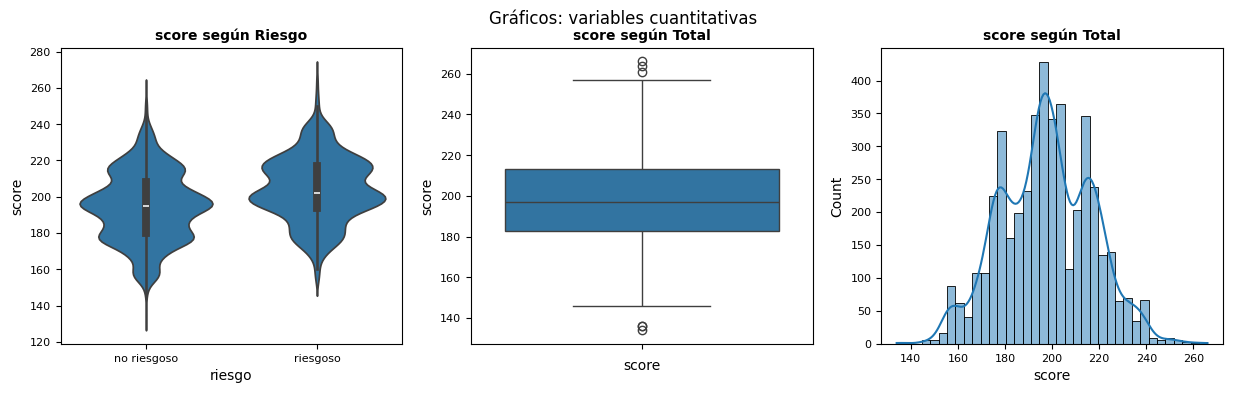

In [ ]:
# Graficando las variables cuantitativas

for i, colum in enumerate(cols_num):
    fig, ax = plt.subplots(1, 3, figsize=(15, 3.84))
    fig.suptitle('Gráficos: variables cuantitativas')

    sns.violinplot(x = 'riesgo', y = colum,  data  = data_riesgo_f, ax=ax[0])
    ax[0].set_title(str(colum) + " según Riesgo", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel('riesgo')

    sns.boxplot(y = colum,  data  = data_riesgo_f, ax=ax[1])
    ax[1].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel(colum)

    sns.histplot(x=colum, data=data_riesgo_f, kde= True, ax=ax[2])
    ax[2].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[2].tick_params(labelsize = 8)
    ax[2].set_xlabel(colum)

In [ ]:
cols_cual =list(cols_cual)
cols_cual.remove('riesgo')
print(cols_cual)

['tipo_vivienda', 'zona', 'nivel']


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

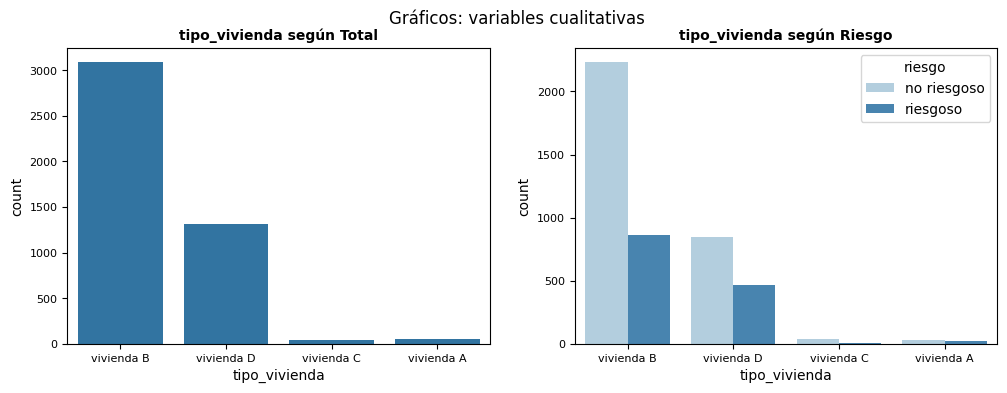

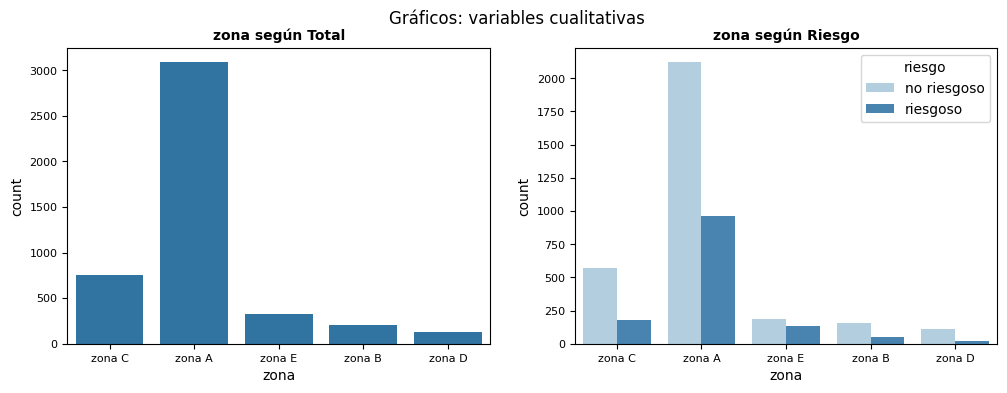

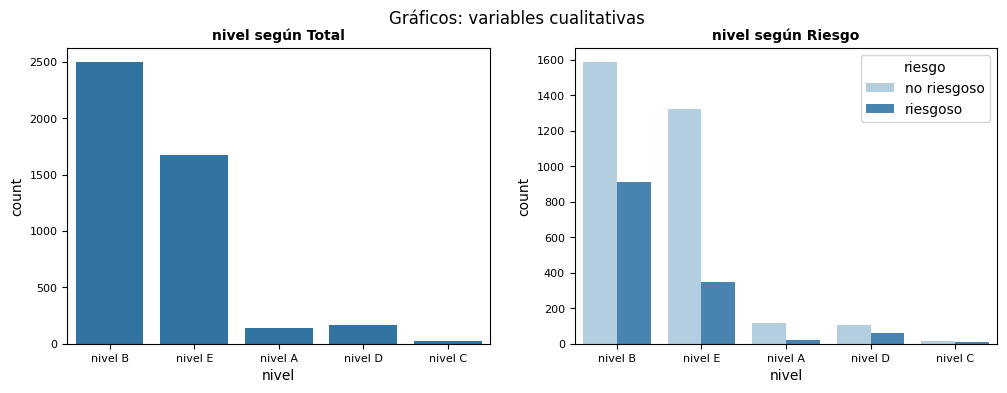

In [ ]:
# Graficando las variables cualitativas

for i, colum in enumerate(cols_cual):
    fig, ax = plt.subplots(1, 2, figsize=(12, 3.84))
    fig.suptitle('Gráficos: variables cualitativas')

    sns.countplot(x=colum, data=data_riesgo_f, ax=ax[0])
    ax[0].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel(colum)

    sns.countplot(x=colum, hue="riesgo", data=data_riesgo_f, palette="Blues", ax=ax[1])
    ax[1].set_title(str(colum) + " según Riesgo", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel(colum)


## Análisis descriptivo

In [ ]:
percentiles = [.1, .25, .5, .75, .9]
Descrip = data_riesgo_f[cols_num].describe(percentiles=percentiles).T
Descrip.T

,edad,meses,max_ant,ingreso,score
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,36.709333,183.818222,26.913556,4495.077702,197.563556
std,9.820684,73.047673,32.680750,5462.829033,19.280483
min,20.000000,95.000000,0.000000,123.700000,134.000000
10%,25.000000,123.000000,0.000000,948.139000,174.000000
25%,29.000000,137.000000,0.000000,1408.105000,183.000000
50%,35.000000,161.000000,14.000000,2500.000000,197.000000
75%,43.000000,207.000000,42.000000,5000.000000,213.000000
90%,51.000000,269.000000,85.100000,10000.000000,221.000000
max,85.000000,678.000000,130.000000,30000.000000,266.000000


## Prueba de normalidad

PLANTEAMIENTO DE LAS HIPóTESIS

Ho: Los datos estan normalmente distribuidos

Ha: Los datos no estan normalmente distribuidos

Nivel de significancia = 5% (0.05)

In [ ]:
#import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore

import matplotlib.pyplot as plt
import seaborn as sns

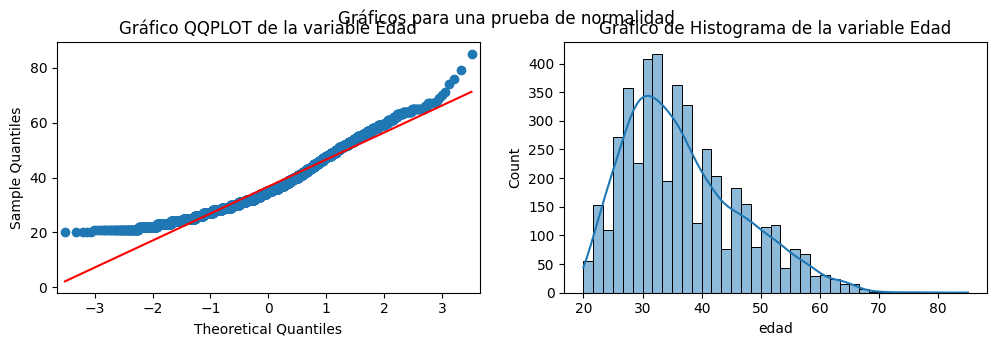

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.25))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable Edad')
axes[1].set_title('Gráfico de Histograma de la variable Edad')

qqplot(data_riesgo_f['edad'] , line='s', ax=axes[0])
sns.histplot(x='edad', data=data_riesgo_f, ax=axes[1], kde= True)
plt.show()

In [ ]:
# Prueba de Shapiro-Wilk (n <= 50)
stat, p = shapiro(data_riesgo_f['edad'])

print('Estadisticos=%.3f, p-value=%.3f' % (stat, p))


Estadisticos=0.952, p-value=0.000


In [ ]:
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_f['edad'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))


Estadisticos=1.000, p-value=0.000


In [ ]:
#Conclusión:
#Con un nivel de significancia del 5%, se afirma que, los datos de la variables "Edad" no están normalmente distribuidos.

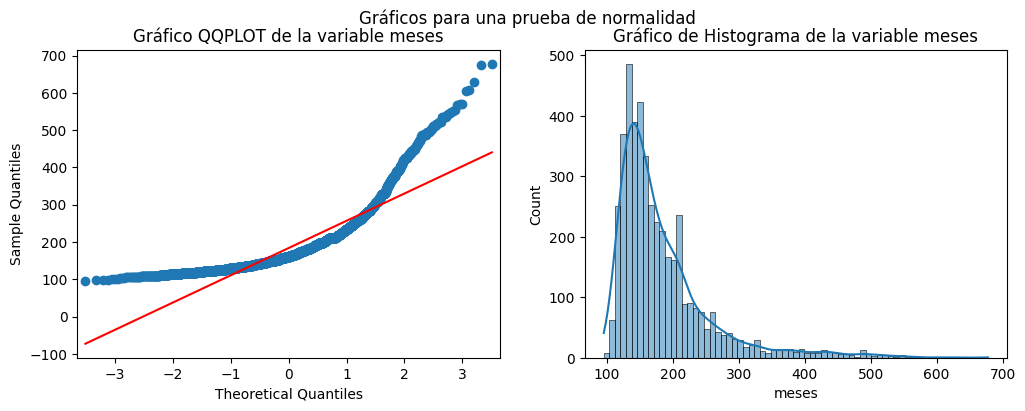

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable meses')
axes[1].set_title('Gráfico de Histograma de la variable meses')

qqplot(data_riesgo_f['meses'] , line='s', ax=axes[0])
sns.histplot(x='meses', data=data_riesgo_f, ax=axes[1], kde= True)
plt.show()

In [ ]:
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_f['meses'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


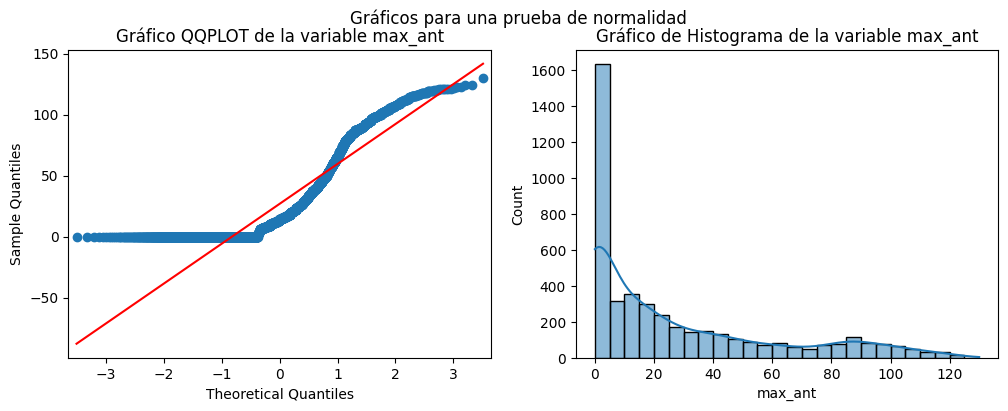

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable max_ant')
axes[1].set_title('Gráfico de Histograma de la variable max_ant')

qqplot(data_riesgo_f['max_ant'] , line='s', ax=axes[0])
sns.histplot(x='max_ant', data=data_riesgo_f, ax=axes[1], kde= True)
plt.show()

In [ ]:
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_f['max_ant'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.642, p-value=0.000


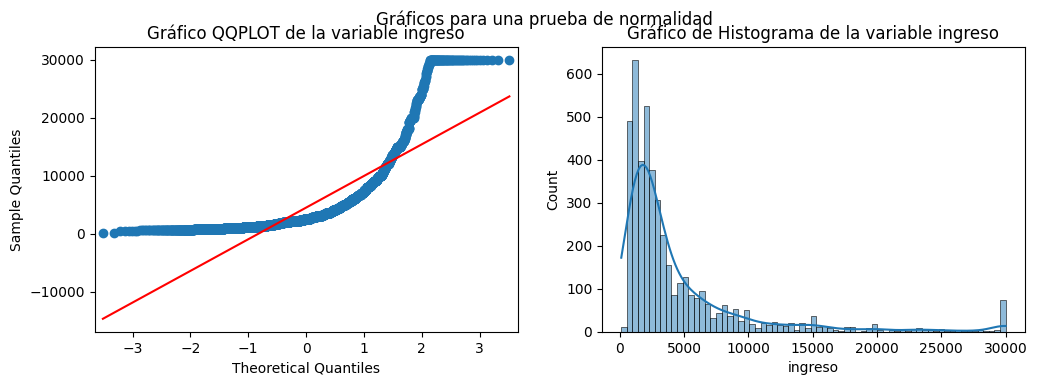

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.7))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable ingreso')
axes[1].set_title('Gráfico de Histograma de la variable ingreso')

qqplot(data_riesgo_f['ingreso'] , line='s', ax=axes[0])
sns.histplot(x='ingreso', data=data_riesgo_f, ax=axes[1], kde= True)
plt.show()

In [ ]:
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_f['ingreso'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


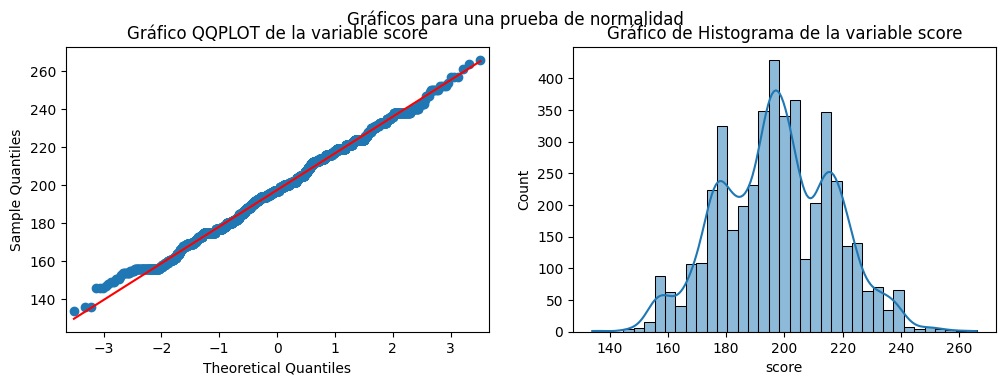

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.7))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable score')
axes[1].set_title('Gráfico de Histograma de la variable score')

qqplot(data_riesgo_f['score'] , line='s', ax=axes[0])
sns.histplot(x='score', data=data_riesgo_f, ax=axes[1], kde= True)
plt.show()

In [ ]:
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_f['score'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


## A. Normalizando variables / transformadas

normalización = ( x – min(x) ) / ( max(x) – min(x) )

Los valores normalizados para todos los demás valores del conjunto de datos estarán entre 0 y 1.

In [ ]:
# Normalizamos las variables numéricas

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_riesgo_num2_norm = scaler.fit_transform(data_riesgo_f[cols_num])
data_riesgo_num2_norm



array([[0.2       , 0.05660377, 0.04615385, 0.10397204, 0.43939394],
       [0.18461538, 0.15437393, 0.05384615, 0.09393064, 0.62878788],
       [0.12307692, 0.11320755, 0.05384615, 0.05890957, 0.51515152],
       ...,
       [0.43076923, 0.16981132, 0.95384615, 0.76570057, 0.68181818],
       [0.29230769, 0.25728988, 0.93076923, 0.41257786, 0.8030303 ],
       [0.69230769, 0.99313894, 0.29230769, 0.66528653, 0.78787879]])

In [ ]:
data_riesgo_num2_norm = pd.DataFrame(
    data=data_riesgo_num2_norm,
    columns=['edad', 'meses', 'max_ant', 'ingreso', 'score'])
data_riesgo_num2_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     4500 non-null   float64
 1   meses    4500 non-null   float64
 2   max_ant  4500 non-null   float64
 3   ingreso  4500 non-null   float64
 4   score    4500 non-null   float64
dtypes: float64(5)
memory usage: 175.9 KB


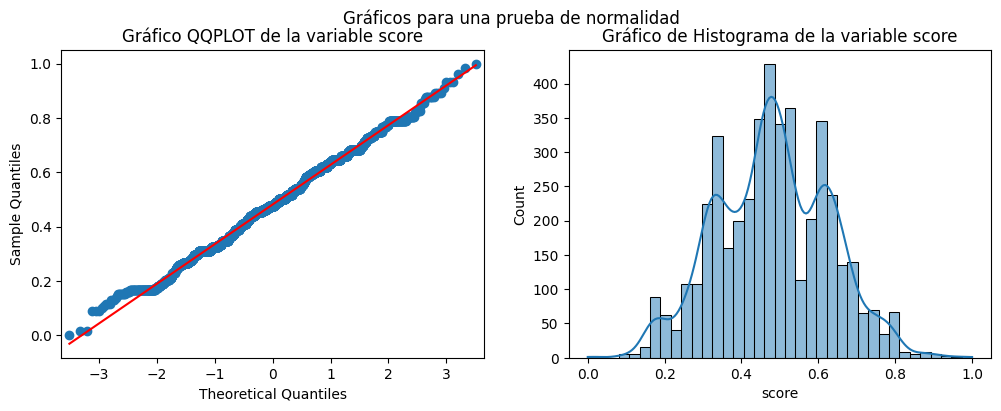

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable score')
axes[1].set_title('Gráfico de Histograma de la variable score')

qqplot(data_riesgo_num2_norm['score'] , line='s', ax=axes[0])
sns.histplot(x='score', data=data_riesgo_num2_norm, ax=axes[1], kde= True)
plt.show()

In [ ]:
# Test de Kolmogorov-Smirnov
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_num2_norm['score'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.560, p-value=0.000


La data sigue sin tener una distribución normal.

## B. Estandarización de variables

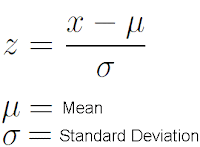



In [ ]:
data_riesgo_num2_estand = zscore(data_riesgo_f[cols_num], axis=1)
data_riesgo_num2_estand

,edad,meses,max_ant,ingreso,score
0,-0.544416,-0.468891,-0.565881,1.997198,-0.418011
1,-0.567871,-0.432580,-0.589978,1.994712,-0.404283
2,-0.596917,-0.411574,-0.626182,1.989112,-0.354438
3,-0.668747,-0.196690,-0.852324,1.934121,-0.216359
4,-0.560013,-0.480081,-0.533369,1.997833,-0.424370
...,...,...,...,...,...
4495,-0.516981,-0.469056,-0.513513,1.999714,-0.500165
4496,-0.527807,-0.465511,-0.518540,1.999508,-0.487649
4497,-0.510874,-0.494902,-0.502560,1.999956,-0.491620
4498,-0.524806,-0.482903,-0.508126,1.999754,-0.483920


In [ ]:
data_riesgo_num2_estand = pd.DataFrame(
    data=data_riesgo_num2_estand,
    columns=['edad', 'meses', 'max_ant', 'ingreso', 'score'])
data_riesgo_num2_estand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     4500 non-null   float64
 1   meses    4500 non-null   float64
 2   max_ant  4500 non-null   float64
 3   ingreso  4500 non-null   float64
 4   score    4500 non-null   float64
dtypes: float64(5)
memory usage: 175.9 KB


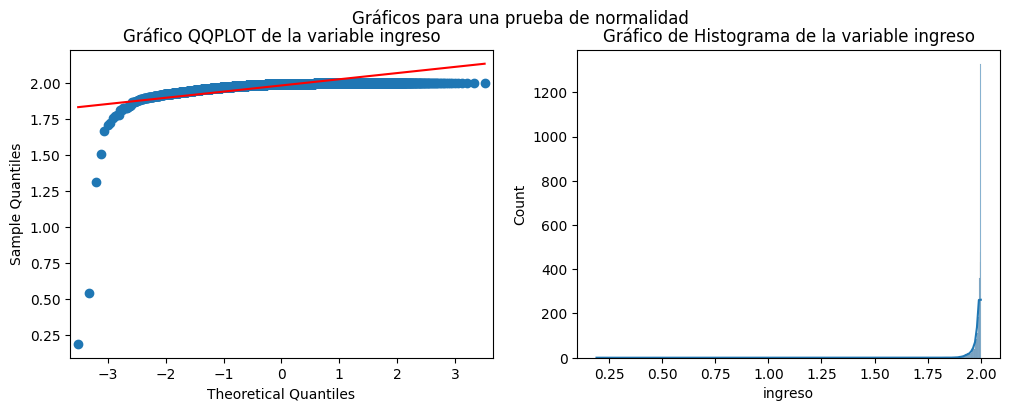

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable ingreso')
axes[1].set_title('Gráfico de Histograma de la variable ingreso')

qqplot(data_riesgo_num2_estand['ingreso'] , line='s', ax=axes[0])
sns.histplot(x='ingreso', data=data_riesgo_num2_estand, ax=axes[1], kde= True)
plt.show()

In [ ]:
# Test de Kolmogorov-Smirnov
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_num2_estand['ingreso'] , 'norm')  #zingreso
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.964, p-value=0.000


## C. Normalización con SKLEARN

Estandariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

skler = StandardScaler()
data_riesgo_num2_skler = skler.fit_transform(data_riesgo_f[cols_num])
data_riesgo_num2_skler


array([[-0.37774818, -0.76421908, -0.64000611, -0.23160496, -0.288591  ],
       [-0.4795854 ,  0.01617997, -0.60940366, -0.28652766,  1.00820113],
       [-0.88693427, -0.3124091 , -0.60940366, -0.47807974,  0.23012585],
       ...,
       [ 1.14981007,  0.13940087,  2.97108339,  3.3878012 ,  1.37130292],
       [ 0.23327512,  0.83765265,  2.87927603,  1.45635279,  2.20124989],
       [ 2.88104277,  6.71118234,  0.3392724 ,  2.83857416,  2.09750652]])

In [ ]:
import numpy as np

np.var(data_riesgo_num2_skler[:, 2]) # revisamos una de las columnas

1.0

In [ ]:
data_riesgo_num2_skler = pd.DataFrame(
    data=data_riesgo_num2_skler,
    columns=['edad', 'meses', 'max_ant', 'ingreso', 'score'])
data_riesgo_num2_skler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     4500 non-null   float64
 1   meses    4500 non-null   float64
 2   max_ant  4500 non-null   float64
 3   ingreso  4500 non-null   float64
 4   score    4500 non-null   float64
dtypes: float64(5)
memory usage: 175.9 KB


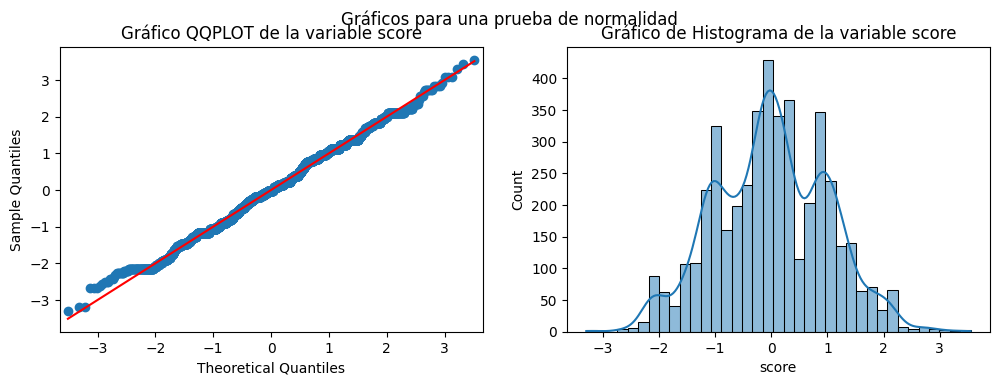

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.7))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable score')
axes[1].set_title('Gráfico de Histograma de la variable score')

qqplot(data_riesgo_num2_skler['score'] , line='s', ax=axes[0])
sns.histplot(x='score', data=data_riesgo_num2_skler, ax=axes[1], kde= True)
plt.show()

In [ ]:
# Test de Kolmogorov-Smirnov
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_num2_skler['score'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.040, p-value=0.000


In [ ]:
# Datos ficticios

import numpy  as np

np.random.seed(1234)

mu, sigma = 0, 1  # Media y desviación estándar
mu1, sigma1 = 0.01, 1.01  # Media y desviación estándar

x = np.random.normal(mu, sigma, 4500)  # generando ua variable aleatoria
y = np.random.normal(mu1, sigma1, 4500)

dat = pd.DataFrame(
    data=np.transpose([x, y]),
    columns=["aleatorioX", "aleatorioY"])
dat.head(10)

,aleatorioX,aleatorioY
0,0.471435,-1.709290
1,-1.190976,-2.091729
2,1.432707,1.138112
3,-0.312652,-0.348366
4,-0.720589,0.925243
5,0.887163,2.283302
6,0.859588,-0.054585
7,-0.636524,0.635614
8,0.015696,-0.921958
9,-2.242685,-0.631845


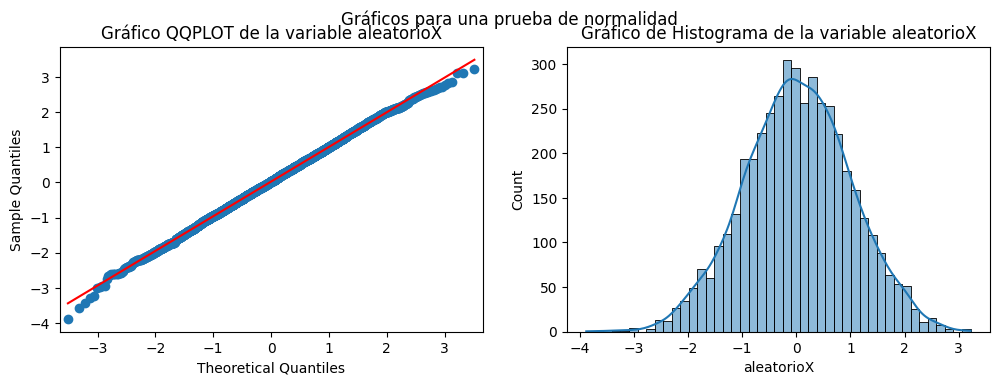

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.7))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable aleatorioX')
axes[1].set_title('Gráfico de Histograma de la variable aleatorioX')

qqplot(dat['aleatorioX'] , line='s', ax=axes[0])
sns.histplot(x='aleatorioX', data=dat, ax=axes[1], kde= True)
plt.show()

In [ ]:
# aleatorioX
stat3, p3 = kstest(dat['aleatorioX'], 'norm', alternative='two-sided' ) # 2 colas
print('Estadisticos=%.3f, p-value=%.3f' % (stat3, p3))

Estadisticos=0.016, p-value=0.172


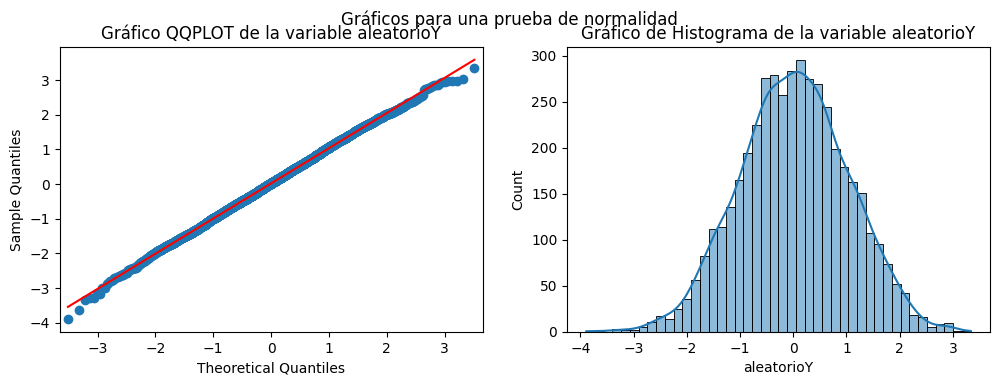

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.7))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable aleatorioY')
axes[1].set_title('Gráfico de Histograma de la variable aleatorioY')

qqplot(dat['aleatorioY'] , line='s', ax=axes[0])
sns.histplot(x='aleatorioY', data=dat, ax=axes[1], kde= True)
plt.show()

In [ ]:
# aleatorioY
stat3, p3 = kstest(dat['aleatorioY'], 'norm', alternative='two-sided' ) # 2 colas
print('Estadisticos=%.3f, p-value=%.3f' % (stat3, p3))

Estadisticos=0.016, p-value=0.192


## Correlaciones


### Prueba de Correlacion: paramétrica  " r pearson"

Planteamiento de hipótesis:

Ho: No existe correlacion entre las variables A y B.

Ha: Existe correlacion entre las variables A y B.

Nivel de significancia = 5%

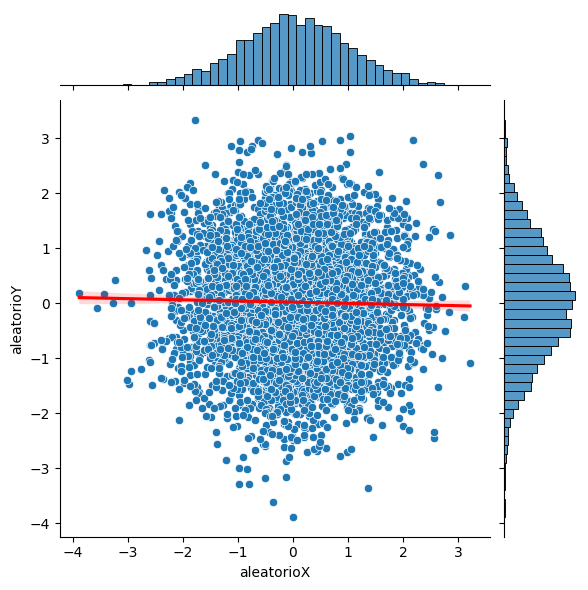

In [ ]:
# Graficamos las variables a correlacionar
# con línea de tendencia
g=sns.jointplot(x=dat['aleatorioX'], y=dat['aleatorioY'])

sns.regplot(x='aleatorioX', y='aleatorioY', data = dat, ax=g.ax_joint, scatter=False, color= 'red');


In [ ]:
# Correlación r de pearson
from scipy.stats import pearsonr, spearmanr

r, p = pearsonr(dat['aleatorioX'], dat['aleatorioY'])

print('Correlación Pearson=%.3f, p-value=%.3f' % (r, p))

Correlación Pearson=-0.021, p-value=0.164


Conclusión: Con un nivel de significancia del 5% se afirma que, no existe correlación entre **aleatorioX** y **aleatorioY**, evidenciándose una correlación de -0.021. Correlación Nula.

### Prueba de Correlacion: No parametrica


Ho: Las variables A y B son mutuamente independientes.

Ha: Las variables A y B son mutuamente dependientes.

Nivel de significancia: 5%

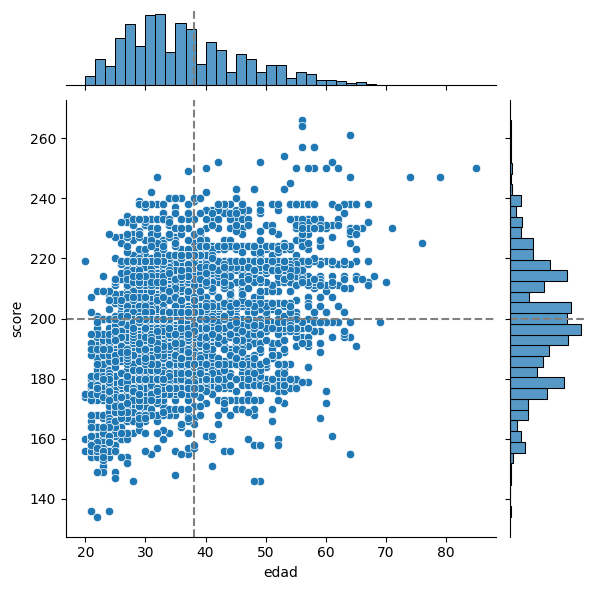

In [ ]:
g = sns.JointGrid(x="edad", y="score", data=data_riesgo_f, palette = "ch:s=.50,rot=-.35")
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=38, y=200)

In [ ]:
# Correlación spearmanr
#from scipy.stats import pearsonr, spearmanr

rho, p = spearmanr(data_riesgo_f['edad'], data_riesgo_f['score'])

print('Correlación Rho=%.3f, p-value=%.3f' % (rho, p))

Correlación Rho=0.417, p-value=0.000


Conclusión: Con un nivel de significancia del 5% se afirma que, la edad y el score son mutuamente dependientes, con una correlación de rho = 0.417.

## Chi - Cuadrado

2 variables son cualitativas (ordinales y/o nominales)

Ho: Las variables A y B son mutuamente independientes.

Ha: Las variables A y B son mutuamente dependientes.

Nivel de significancia: 5%


In [ ]:
#                                          VI                        VD
contingencia= pd.crosstab(data_riesgo_f['tipo_vivienda'], data_riesgo_f['riesgo'])
contingencia

riesgo,no riesgoso,riesgoso
tipo_vivienda,,
vivienda A,32,18
vivienda B,2234,858
vivienda C,35,6
vivienda D,849,468


<Axes: xlabel='riesgo', ylabel='tipo_vivienda'>

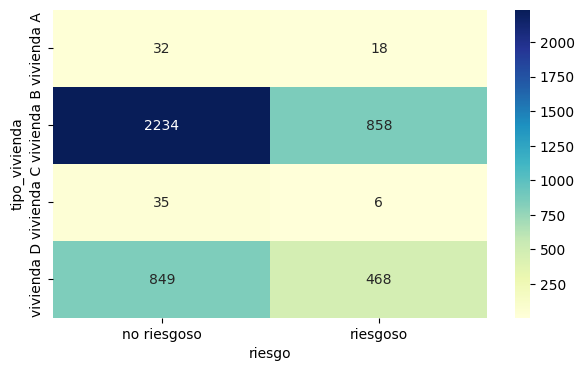

In [ ]:
# Mapa de calor
plt.figure(figsize=(7,4))
sns.heatmap(contingencia, annot=True, cmap="YlGnBu", fmt=".5g")

In [ ]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency

c, p, dof, expected = chi2_contingency(contingencia)
# Print the p-value
print('p-value = %.3f'% p)

p-value = 0.000


## Prueba de  Dos muestras Independientes - PARAMÉTRICO

Ho: Mu1 = Mu2; No existen diferencias entre las medias.

Ha: Mu1 <> Mu2; Existen diferencias entre las medias.

Nivel de significancia: 5%

"Prueba de T de Student""
Utilizamos cuando los 2 grupos o muestras, la variable de investigaci?n tienen distribuciones normales.


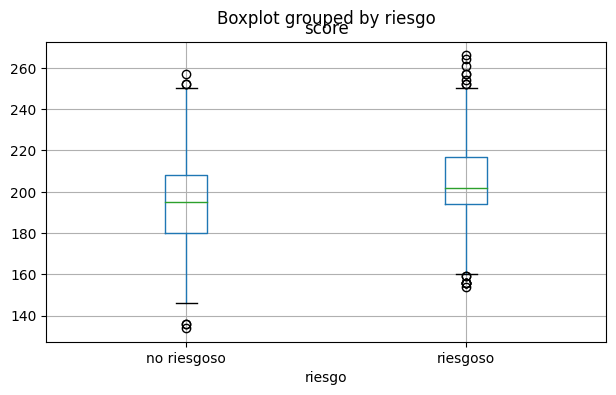

In [ ]:
# Graficamos

data_riesgo_f.boxplot(column="score", by="riesgo",
	figsize=(7,4))
plt.show()

In [ ]:
# Extrayendo la data para la prueba: riesgo y score

score_riesgo_0 = data_riesgo_f[data_riesgo_f['riesgo'] =="no riesgoso"]['score']
score_riesgo_1 = data_riesgo_f[data_riesgo_f['riesgo'] =='riesgoso']['score']
print("riesgo 0= ", score_riesgo_0 )
print("riesgo 1= ", score_riesgo_1 )

riesgo 0=  0       192.0
1       217.0
2       202.0
3       194.0
4       200.0
        ...  
3145    155.0
3146    155.0
3147    225.0
3148    214.0
3149    224.0
Name: score, Length: 3150, dtype: float64
riesgo 1=  3150    194.0
3151    221.0
3152    224.0
3153    188.0
3154    177.0
        ...  
4495    214.0
4496    219.0
4497    224.0
4498    240.0
4499    238.0
Name: score, Length: 1350, dtype: float64


In [ ]:
# Realizando la prueba t de 2 muestras independientes
from scipy.stats import ttest_ind

stadis, p = ttest_ind(score_riesgo_0, score_riesgo_1)

print('Prueba T=%.3f, p-value=%.3f' % (stadis, p))

Prueba T=-16.088, p-value=0.000


Conclusion: Con un nivel de significancia del 5% se afirma que, existen diferencias entre las medias del score por tipo de riesgo.


## Prueba de Dos muestras Dependientes o Pareadas - PARAMÉTRICA

Ho: Mu1 = Mu2; No existen diferencias entre las medias.

Ha: Mu1 <> Mu2; Existen diferencias entre las medias.

"Prueba de T de Student" Utilizamos cuando los 2 grupos o muestras, la variable de investigación tienen distribuciones normales.

In [ ]:
# Para este caso, vamos a generar datos aleatorios de tipo riesgo.

#Observaremos en un 1er momento y 2do momento

import numpy  as np

np.random.seed(987654320)

mu1, sigma1 = 180, 60  # Media y desviación estándar
mu2, sigma2 = 250, 65  # Media y desviación estándar

P1er_momento = np.random.normal(mu1, sigma1, 4500)  # generando una variable aleatoria
P2do_momento = np.random.normal(mu2, sigma2, 4500)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

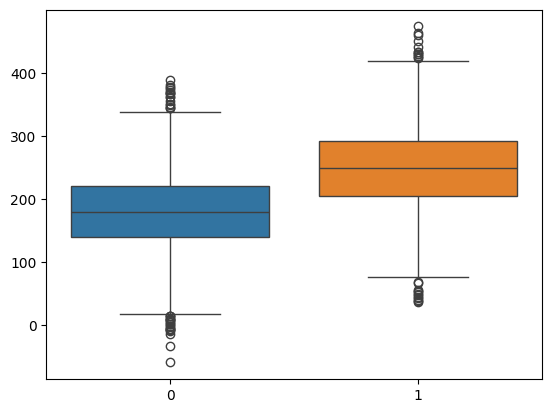

In [ ]:
# Graficamos
import seaborn as sns

x= [P1er_momento, P2do_momento]
ax=sns.boxplot(data=x)

In [ ]:
# Realizando la prueba t de 2 muestras dependientes o pareadas
from scipy.stats import ttest_rel

stadis, p = ttest_rel(P1er_momento, P2do_momento)

print('Estadístico=%.3f, p-value=%.3f' % (stadis, p))

Estadístico=-52.970, p-value=0.000


Conclusion: Con un nivel de significancia del 5% se afirma que, existen diferencias entre el score observado en el 1er momento y el 2do momento.

## Prueba de ANOVA: "n" muestras independientes - PARAMÉTRICA

Ho: Mu1 = Mu2  = Mun; No existen diferencias entre las medias de los "n" grupos.

Ha: Mu1 <> Mun; Existen diferencias entre al menos dos medias.

"Prueba de ANOVA" Utilizamos cuando los "n" grupos o muestras, en la variable de investigación tienen distribuciones normales.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


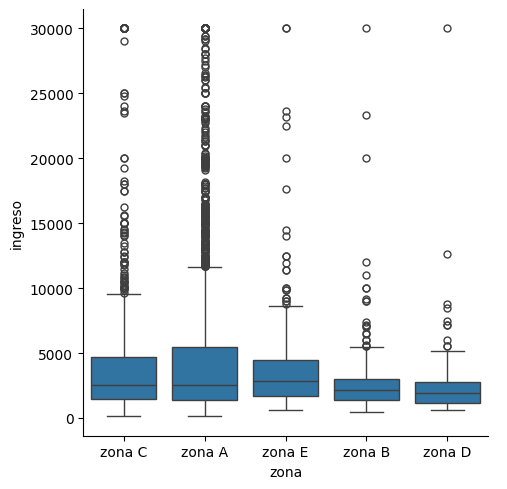

In [ ]:
# Graficamos
import seaborn as sns

sns.catplot(x = "zona", y = "ingreso", data = data_riesgo_f, kind = "box");

In [ ]:
# Tabla de frecuencia de la variable de agrupamiento
zona_count = (data_riesgo_f
                       .groupby("zona")
                       .agg(frequency=("zona", "count")))

zona_count["Acumulado"] = zona_count["frequency"].cumsum()
zona_count

,frequency,Acumulado
zona,,
zona A,3088,3088
zona B,210,3298
zona C,749,4047
zona D,131,4178
zona E,322,4500


Continuamos bajo el supuesto de normalidad de los datos

In [ ]:
# Realizando la prueba ANOVA para "n" muestras independientes

import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('ingreso ~ zona', data =data_riesgo_f).fit()
anova = sm.stats.anova_lm(mod, typ=2)

print(anova)

                sum_sq      df          F        PR(>F)
zona      1.394980e+09     4.0  11.798381  1.555992e-09
Residual  1.328664e+11  4495.0        NaN           NaN


Conclusion: Con un nivel de significancia del 5% se afirma que, al menos un par de medias son significativamente distintas la una de la otra.

## Test de Levene
Prueba de igualdad de varianzas

Ho: No existen diferencias entre las varianzas / homoscedasticidad (igualdad de varianzas)

Ha: Existen diferencias entre las varianzas / no son iguales (homogénea)

In [ ]:
# Extrayendo la data para la prueba: riesgo y score

zona_1 = data_riesgo_f[data_riesgo_f['zona'] =='zona A']['ingreso']
zona_2 = data_riesgo_f[data_riesgo_f['zona'] =='zona B']['ingreso']
zona_3 = data_riesgo_f[data_riesgo_f['zona'] =='zona C']['ingreso']
zona_4 = data_riesgo_f[data_riesgo_f['zona'] =='zona D']['ingreso']

print("zona 1= ", zona_1 )
print("zona 2= ", zona_2 )
print("zona 3= ", zona_3 )
print("zona 4= ", zona_4 )


zona 1=  1        2930.0
2        1883.7
3         850.0
4        3200.0
7         800.0
         ...   
4492    30000.0
4493     5250.0
4494     7500.0
4495    24000.0
4497    23000.0
Name: ingreso, Length: 3088, dtype: float64
zona 2=  6        2171.50
24       3486.70
69       1800.00
73       3500.00
95       3420.36
          ...   
4368     2330.65
4378     6529.52
4431     5442.50
4436    10000.00
4451     3600.00
Name: ingreso, Length: 210, dtype: float64
zona 3=  0        3230.0
8        3150.0
16       2432.0
17       1400.0
18       3000.0
         ...   
4398    10000.0
4401     4900.0
4453     5500.0
4458     2555.0
4488    15600.0
Name: ingreso, Length: 749, dtype: float64
zona 4=  14      1050.00
40      1460.00
42       966.06
53      2248.76
77      1239.30
         ...   
3940    2800.00
3995    1288.39
3999    3000.00
4110    7461.05
4421    5546.00
Name: ingreso, Length: 131, dtype: float64


In [ ]:
from scipy.stats import levene

stat, p = levene(zona_1, zona_2, zona_3, zona_4)

print('Prueba Igualdad de Varianzas=%.3f, p-value=%.3f' % (stat, p))


Prueba Igualdad de Varianzas=13.588, p-value=0.000


Siendo que Pvalue <= 0.05, el test Levene encuentra diferencias significativas entre las varianzas de los dos grupos.

## Prueba de Dos Proporciones - PARAMÉTRICA

Ho: Pa = Pb ; la proporción (a) no es diferente de la proporción (b)

Ha: Pa <> Pb; la proporción (a) es diferente de la proporción (b)

Nivel de significancia: 5% = 0.05


In [ ]:
from scipy.stats import norm
import numpy as np

# observaciones "Tamaño de las muestras"
n1 = 200  # clientes
n2 = 300  # Usuarios

# aciertos / la misma variable "Clientes/Usuarios totalmente satisfechos"
x1 = 50   # clientes
x2 = 150  # Usuarios

p1 = x1/n1  # clientes
p2 = x2/n2  # usuarios

p= (x1 + x2)/(n1 + n2) # proporción muestral

z_stat = (p1 - p2) / np.sqrt(p*(1-p)*((1/n1) + (1/n2)))
p = norm.cdf(z_stat)

print('Diferencia de proporciones=%.3f, p-value=%.3f' % (z_stat, p))

Diferencia de proporciones=-5.590, p-value=0.000


Decision: la proporción (a) es diferente de la proporción (b)

## PRUEBA WILCOXON 2 MUESTRAS RELACIONADAS O PAREADAS
(no paramétrica)

Ho: Med(Diferencia) = 0; La mediana de las diferencias de cada par de datos es cero.

Ha: Med(Diferencia) <> 0; La mediana de las diferencias de cada par de datos es diferente de cero.

Nivel de significancia: 5% = 0.05

In [ ]:
# Trabajamos la data
P1er_momento = np.random.random(4500)*250
P2do_momento = np.random.random(4500)*265

# Variable: velocidad
print(P1er_momento)
print(P2do_momento)


[157.9350734  238.75975775   8.79731246 ... 141.85109421 112.81797803
  44.27975655]
[158.44069099 239.74512714 185.64419913 ... 240.35332603 243.11633852
 216.6906306 ]


In [ ]:
from scipy.stats import wilcoxon

wi_test, p = wilcoxon(P1er_momento, P2do_momento)

print('Prueba de Wilcoxon=%.3f, p-value=%.3f' % (wi_test, p))

Prueba de Wilcoxon=4790572.000, p-value=0.002


Decisión: La mediana de las diferencias de la Velocidad en el 1er y 2do momento es diferente de cero.

## Prueba U de Mann Whitney: muestras independientes

(no paramétrica)

Diferencia de medianas

Ho: U1 = U2; de la variable de estudio.

Ha: U1 <> U2; de la variable de estudio

Nivel de significancia: 5%


In [ ]:
# Extrayendo la data para la prueba: riesgo y edad

edad_riesgo_0 = data_riesgo_f[data_riesgo_f['riesgo'] =='riesgoso']['edad']
edad_riesgo_1 = data_riesgo_f[data_riesgo_f['riesgo'] =='no riesgoso']['edad']
print("riesgo 0= ", edad_riesgo_0 )
print("riesgo 1= ", edad_riesgo_1 )

riesgo 0=  3150    37.0
3151    33.0
3152    41.0
3153    44.0
3154    38.0
        ... 
4495    54.0
4496    63.0
4497    48.0
4498    39.0
4499    65.0
Name: edad, Length: 1350, dtype: float64
riesgo 1=  0       33.0
1       32.0
2       28.0
3       56.0
4       32.0
        ... 
3145    64.0
3146    64.0
3147    76.0
3148    33.0
3149    45.0
Name: edad, Length: 3150, dtype: float64


In [ ]:
print("Con riesgo --> n1: ", len(edad_riesgo_0))
print("Sin riesgo --> n2: ", len(edad_riesgo_1))

Con riesgo --> n1:  1350
Sin riesgo --> n2:  3150


In [ ]:
from scipy.stats import kruskal

KW_test, p =kruskal(edad_riesgo_0, edad_riesgo_1)

print('Prueba de U de Mann Whitney=%.3f, p-value=%.3f' % (KW_test, p))

Prueba de U de Mann Whitney=74.413, p-value=0.000


Conclusión: con un nivel de significancia del 5%, afirmamos que la edad de los riesgosos y no riesgosos es estadísticamente diferente.

Gracias DATA & ANALYTICS!!!